In [1]:
%%time

# import libraries used in this project 

import os
import fnmatch

import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

import scipy.stats

# configure matplot to not warn on large data set 
plt.rcParams.update({'figure.max_open_warning': 0})
%matplotlib inline

CPU times: user 1.13 s, sys: 264 ms, total: 1.4 s
Wall time: 1.4 s


In [2]:
%%time

#
# method to get zero_crossing, sepctral_centroid, spectral_rolloff, and chroma_stft features from .wav files
#
def getDataFrame(inputFolders,dataFrameColumns,heartbeatclassifier):
    inputList=[]
    counter=0
    for inputFolder in inputFolders:
        for soundType in heartbeatclassifier:
            filesOfCategory=fnmatch.filter(os.listdir("./data/"+inputFolder+"/"),soundType+"*.wav")
            
            if soundType == "extrastole":
                moreFiles=fnmatch.filter(os.listdir("./data/"+inputFolder+"/"),"extrahls*.wav")
                filesOfCategory = filesOfCategory + moreFiles
                
                
            for file in filesOfCategory:
                x,sr=librosa.load("./data/"+inputFolder+"/"+file,duration=5,res_type='kaiser_fast')
                inputList.append([np.mean(x) for x in librosa.feature.mfcc(x,sr=sr)])
                
                inputList[counter].append(np.mean(librosa.feature.fourier_tempogram(x,sr=sr)))
                inputList[counter].append(np.mean(librosa.feature.tempogram(x,sr=sr)))
                
                inputList[counter].append(np.mean(librosa.feature.zero_crossing_rate(x)))
                inputList[counter].append(np.mean(librosa.feature.tonnetz(x,sr=sr)))
                inputList[counter].append(np.mean(librosa.feature.poly_features(x,sr=sr)))
                inputList[counter].append(np.mean(librosa.feature.spectral_rolloff(x,sr=sr)))
                inputList[counter].append(np.mean(librosa.feature.spectral_flatness(x)))
                inputList[counter].append(np.mean(librosa.feature.spectral_contrast(x)))
                inputList[counter].append(np.mean(librosa.feature.spectral_bandwidth(x)))
                inputList[counter].append(np.mean(librosa.feature.spectral_centroid(x)))
                inputList[counter].append(sum(librosa.feature.rms(x)))
                inputList[counter].append(sum(librosa.feature.melspectrogram(x,sr=sr)))
                inputList[counter].append(sum(librosa.feature.chroma_cens(x,sr=sr)))
                inputList[counter].append(sum(librosa.feature.chroma_cqt(x,sr=sr)))
                inputList[counter].append(np.mean(librosa.feature.chroma_stft(x,sr=sr)))
                inputList[counter].append(sum(librosa.zero_crossings(x)))
                
                
                
                inputList[counter].append(soundType)
                counter+=1
    return pd.DataFrame(inputList,columns=dataFrameColumns)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


In [3]:
%%time

# music_folders=["set_a"]
music_folders=["set_a","set_b"]

# label frequency and librosa feature column headers
inputColums1=["Freq"+str(i) for i in range(20)]
inputColums2=["fourier_tempogram","tempogram","zero_crossing_rate","tonnetz","poly_features","spectral_rolloff","spectral_flatness","spectral_contrast","spectral_bandwidth","spectral_centroid","rms","melspectrogram","chroma_cens","chroma_cqt","chroma_stft","zero_crossings","outputbeatclassifier"]
print(str(len(inputColums1) + len(inputColums2)))
inputColums1.extend(inputColums2)

# label output classifiers
outputClassifier=["normal","artifact","murmur","extrastole"]

# process data
dataframe=getDataFrame(music_folders,inputColums1,outputClassifier)

# save data frame to csv
dataframe.to_csv(r'music_dataframe2.csv', index = False)

# read from existing saved datafram
dataframe = pd.read_csv (r'music_dataframe.csv')

37


/Users/vijit/opt/anaconda3/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=384 is too small for input signal of length=216
  warnings.warn(
/Users/vijit/opt/anaconda3/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=384 is too small for input signal of length=214
  warnings.warn(
/Users/vijit/opt/anaconda3/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=384 is too small for input signal of length=150
  warnings.warn(
/Users/vijit/opt/anaconda3/lib/python3.8/site-packages/librosa/core/pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")
/Users/vijit/opt/anaconda3/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=384 is too small for input signal of length=41
  warnings.warn(
/Users/vijit/opt/anaconda3/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=102

CPU times: user 58min 23s, sys: 51.6 s, total: 59min 15s
Wall time: 8min 3s


In [4]:
%%time

# print data frame
dataframe.head()

CPU times: user 110 µs, sys: 1e+03 ns, total: 111 µs
Wall time: 114 µs


,Freq0,Freq1,Freq2,Freq3,Freq4,Freq5,Freq6,Freq7,Freq8,Freq9,...,Freq15,Freq16,Freq17,Freq18,Freq19,zero,centroid,rolloff,chromagram,outputbeatclassifier
0,-489.621796,70.239189,61.142830,48.898048,36.555328,26.469486,19.623278,15.663741,13.472218,11.869776,...,2.056817,2.049077,2.306891,2.535395,2.566249,605,157.260560,208.852132,0.743970,normal
1,-406.428528,153.238861,-1.369525,16.263828,10.937109,16.939487,4.494656,6.633343,6.228123,3.696192,...,-2.767086,-3.141026,-3.952870,-3.527147,-4.081270,7624,1046.537575,1888.940430,0.663114,normal
2,-511.582214,82.091522,6.478385,35.782322,4.926917,23.501289,2.172138,16.772097,-0.364136,12.615508,...,4.534374,-2.864163,2.395745,-2.710135,1.320220,22103,2243.817234,4613.987223,0.754454,normal
3,-514.132935,78.292191,65.463066,49.305317,34.505836,23.954039,18.073490,15.343872,13.722631,11.918728,...,1.235011,1.578198,2.168477,2.570371,2.564390,660,167.595804,213.587443,0.703607,normal
4,-371.671722,155.286530,35.827465,19.501045,37.935871,34.704395,17.897236,9.181622,10.555705,10.437612,...,-3.627311,-3.266012,0.071095,0.160198,-1.439477,1834,513.218302,749.435967,0.634785,normal


In [5]:
%%time

# statistically describe librosa features
columnsToDescribe=["zero","centroid","rolloff","chromagram"]
dataframe[columnsToDescribe].describe()

CPU times: user 10.8 ms, sys: 1.79 ms, total: 12.6 ms
Wall time: 11.1 ms


,zero,centroid,rolloff,chromagram
count,585.000000,585.000000,585.000000,585.000000
mean,4062.259829,593.459736,1163.797054,0.663512
std,8735.425918,840.006987,1452.608685,0.079439
min,161.000000,101.834424,74.468994,0.115923
25%,958.000000,266.161344,543.713379,0.643089
50%,1529.000000,323.542573,676.552012,0.681797
75%,2502.000000,415.151187,860.391899,0.707757
max,75315.000000,6769.973347,8923.169963,0.806292


In [6]:
%%time

# statistically describe frequencies
freqColums=["Freq"+str(i) for i in range(20)]
dataframe[freqColums].describe()

CPU times: user 35.1 ms, sys: 2.52 ms, total: 37.6 ms
Wall time: 35.6 ms


,Freq0,Freq1,Freq2,Freq3,Freq4,Freq5,Freq6,Freq7,Freq8,Freq9,Freq10,Freq11,Freq12,Freq13,Freq14,Freq15,Freq16,Freq17,Freq18,Freq19
count,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000
mean,-405.757946,170.079428,54.052007,-1.498439,1.345889,27.155482,20.358246,2.652989,-3.246019,10.722109,13.194057,4.294947,-5.005561,0.597928,5.872527,4.242858,-2.246271,-0.726721,3.581544,4.159655
std,93.353767,48.520015,26.297832,23.266973,12.645158,9.634136,12.516750,9.144572,8.266007,6.241936,10.146853,4.716163,4.521289,3.401845,6.309628,3.699300,4.221884,3.813255,4.734485,3.515664
min,-1081.043335,-29.527250,-72.262596,-53.103825,-28.883732,-31.063078,-44.440163,-43.664692,-49.969437,-38.816525,-31.041985,-35.024479,-22.014156,-18.243839,-20.437279,-14.023951,-13.795611,-25.276119,-16.287870,-11.521476
25%,-443.315155,155.420853,52.296009,-17.343857,-5.253887,22.754147,19.233067,-1.925813,-7.692395,8.333854,12.741400,2.292238,-7.601873,-1.298143,5.311940,2.965489,-4.529719,-2.209787,2.712182,3.098541
50%,-403.216949,177.656403,62.453419,-4.244802,0.300408,27.771646,23.946444,2.696302,-2.829227,11.513292,16.187937,5.078257,-5.150558,0.380347,7.603932,5.057027,-2.086371,-0.976935,4.631459,5.032918
75%,-365.044312,199.055923,68.766457,8.346755,5.557584,33.162655,27.599564,7.811433,1.094737,14.004535,18.846331,7.108112,-2.797366,1.936331,9.408846,6.316283,-0.114404,0.263281,5.920696,6.155967
max,130.121475,271.676331,91.316147,62.930393,48.075516,50.836891,48.271702,38.122517,20.969564,24.214865,27.890099,23.331343,23.732828,29.896132,43.768089,27.439344,47.039963,50.584553,39.139015,32.866734


CPU times: user 590 ms, sys: 5.62 ms, total: 596 ms
Wall time: 603 ms


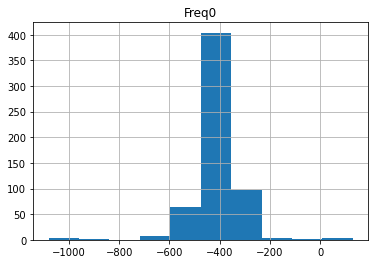

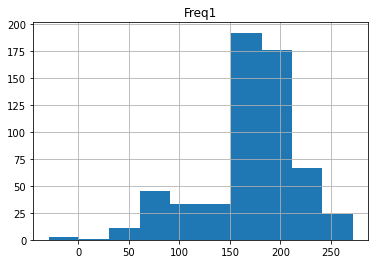

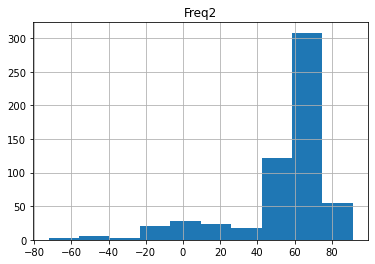

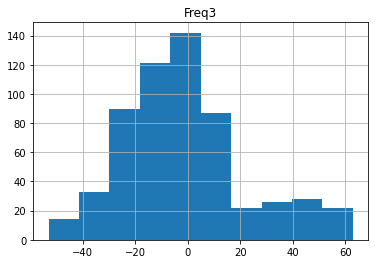

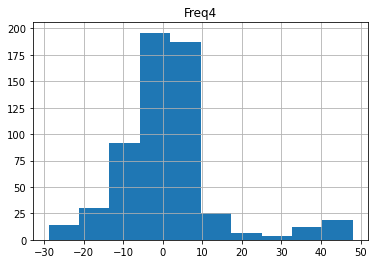

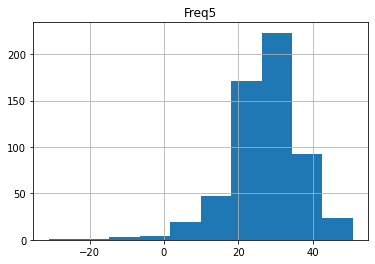

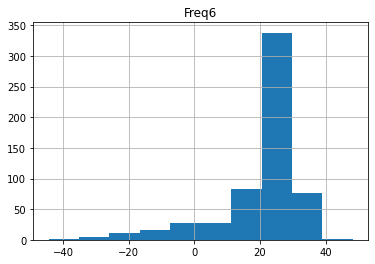

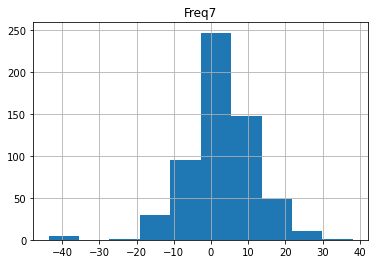

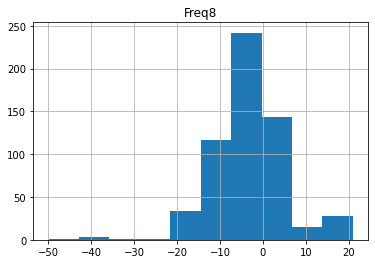

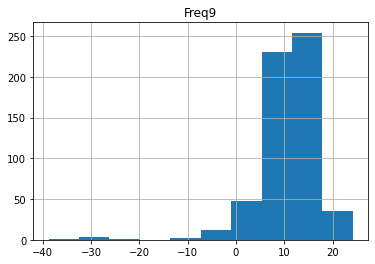

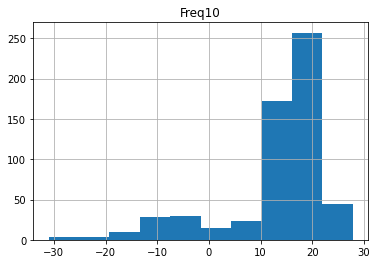

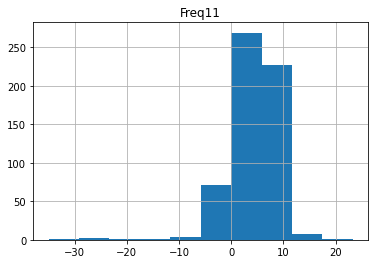

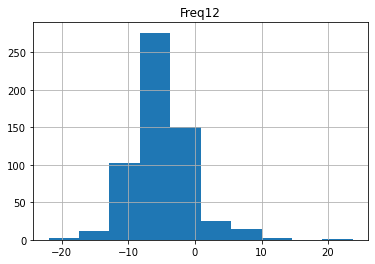

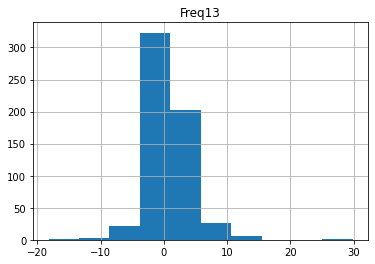

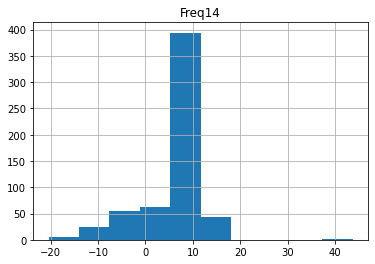

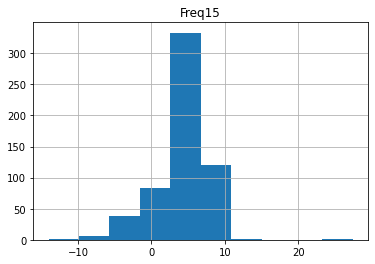

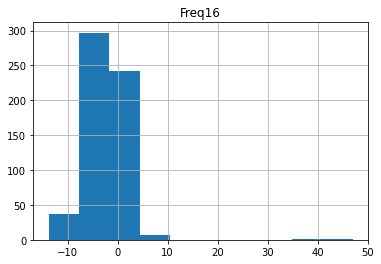

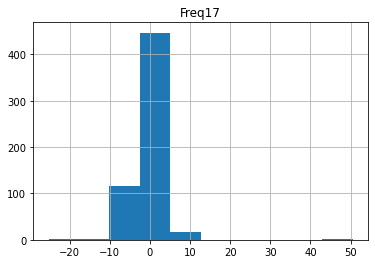

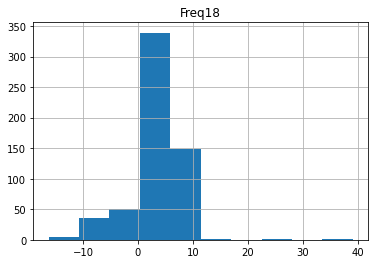

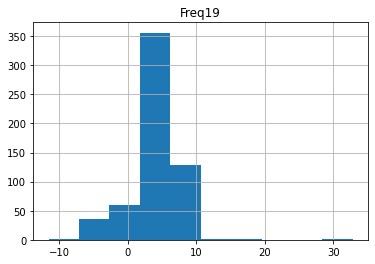

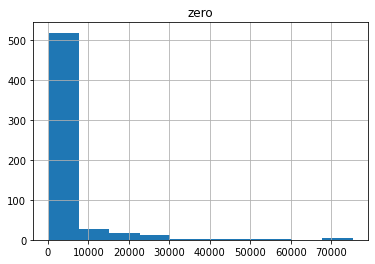

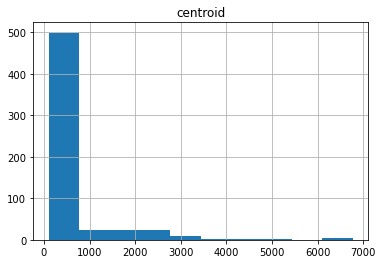

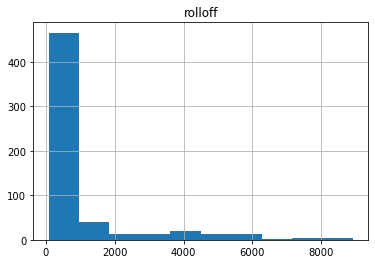

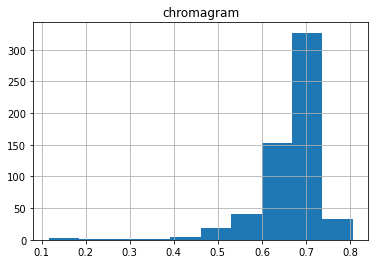

In [7]:
%%time

# graph data frame 
columnsToRemove=["filename","outputbeatclassifier"]
for col in dataframe.columns:
    if(col not in columnsToRemove):
        dataframe.hist(column=col)

CPU times: user 76.3 ms, sys: 8.63 ms, total: 84.9 ms
Wall time: 83.4 ms


<AxesSubplot:>

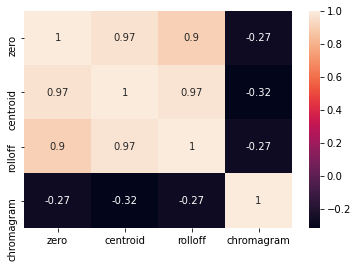

In [8]:
%%time

# graph heat map for dataframe
inputColumns= dataframe.iloc[:,20:]
correlation_mat = inputColumns.corr()
sns.heatmap(correlation_mat, annot = True)

In [9]:
%%time

# classification of each file in dataframe
x=dataframe.iloc[:,:-1]
y=dataframe.iloc[:,-1]

values = np.array(y)
    
enc = OneHotEncoder(handle_unknown='ignore')

# enc.fit(y)
# print(enc.transform(y))

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
# print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

print(x)


correlation= scipy.stats.kendalltau(x,onehot_encoded)
print(correlation)

[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
          Freq0       Freq1      Freq2      Freq3      Freq4      Freq5  \
0   -489.621796   70.239189  61.142830  48.898048  36.555328  26.469486   
1   -406.428528  153.238861  -1.369525  16.263828  10.937109  16.939487   
2   -511.582214   82.091522   6.478385  35.782322   4.926917  23.501289   
3   -514.132935   78.292191  65.463066  49.305317  34.505836  23.954039   
4   -371.671722  155.286530  35.827465  19.501045  37.935871  34.704395   
..          ...         ...        ...        ...        ...        ...   
580 -385.163147  147.967682  56.438553  -0.010340   4.556902  27.771646   
581 -428.294556  219.734024  66.047279 -18.384985  -0.833335  34.215862   
582 -395.915558  159.761154  64.162262   5.620559   9.628162  30.938395   
583 -338.494293  166.074570  74.668808  12.581389   6.507589  22.472439   
584 -406.673370  199.588562  56.948044 -22.696789  -5.053452  33.361019   

   

ValueError: All inputs to `kendalltau` must be of the same size, found x-size 14040 and y-size 2340